# Urde Dataset

In [2]:
# paper: https://www.nature.com/articles/s41597-022-01918-x
# download link: https://figshare.com/articles/dataset/URDEdataset/20459784

In [4]:
"""
Load the source dataset and preprocess it

__ imgs
    |
    |__ fold_1
          |__ datasetname_id.png
          |__ ...
    |__ fold_2
          |__ datasetname_id.png
          |__ ...
    |__ fold_3
          |__ datasetname_id.png
          |__ ...
    |__ fold_4
          |__ datasetname_id.png
          |__ ...
          |__ datasetname_id.png
          |__ ...

__ masks
    |
    |__ fold_1
          |__ datasetname_id.png  --> segmentation mask
          |__ datasetname_id.json --> segmentation box (COCO format)
          |__ ...
    |__ fold_2
          |__ datasetname_id.png
          |__ datasetname_id.json
          |__ ...
    |__ fold_3
          |__ datasetname_id.png
          |__ datasetname_id.json
          |__ ...
    |__ fold_4
          |__ datasetname_id.png
          |__ datasetname_id.json
          |__ ...
    |__ fold_5
          |__ datasetname_id.png
          |__ datasetname_id.json
          |__ ...

For segmentation masks --> 0 and 1 (if more than 2 labels --> use SimpleITK to encode integers in images)
For segmentation boxes --> use the COCO format to encode boxes
"""

'\nLoad the source dataset and preprocess it\n\n__ imgs\n    |\n    |__ fold_1\n          |__ datasetname_id.png\n          |__ ...\n    |__ fold_2\n          |__ datasetname_id.png\n          |__ ...\n    |__ fold_3\n          |__ datasetname_id.png\n          |__ ...\n    |__ fold_4\n          |__ datasetname_id.png\n          |__ ...\n          |__ datasetname_id.png\n          |__ ...\n\n__ masks\n    |\n    |__ fold_1\n          |__ datasetname_id.png  --> segmentation mask\n          |__ datasetname_id.json --> segmentation box (COCO format)\n          |__ ...\n    |__ fold_2\n          |__ datasetname_id.png\n          |__ datasetname_id.json\n          |__ ...\n    |__ fold_3\n          |__ datasetname_id.png\n          |__ datasetname_id.json\n          |__ ...\n    |__ fold_4\n          |__ datasetname_id.png\n          |__ datasetname_id.json\n          |__ ...\n    |__ fold_5\n          |__ datasetname_id.png\n          |__ datasetname_id.json\n          |__ ...\n\nFor segm

In [1]:
import os
import zipfile
import random
import shutil
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from helpers import check_dir_consistency

In [2]:
seed = 42
nb_folds = 5

In [3]:
input_dir = '/home/rob/Documents/3_projects/bench/URDE'
output_dir = '/home/rob/Documents/3_projects/bench/URDE'
file_name = 'URDEdataset_r2.zip'

data_source = os.path.join(input_dir, file_name)
print(f'Data file location: {data_source}')
tmp_data_dir = os.path.join(output_dir, 'tmp_data')
if not os.path.exists(tmp_data_dir):
    os.mkdir(tmp_data_dir)
    print('Created tmp_data_dir')
else:
    print('tmp_data_dir already exists.')

Data file location: /home/rob/Documents/3_projects/bench/URDE/URDEdataset_r2.zip
tmp_data_dir already exists.


In [6]:
# Unzip
with zipfile.ZipFile(data_source, 'r') as zip_file:
    zip_file.extractall(tmp_data_dir)

print("\n".join([os.path.join(root, name) for root, dirs, files in os.walk(tmp_data_dir) for name in dirs]))

/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/DustReadings
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/RandomDataset_897
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/SequentialDataset_7k
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/RandomDataset_100
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/DustReadings/Dust_Readings
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/DustReadings/Segmentation_masks
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/DustReadings/Hand_Annotated
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/DustReadings/Max_Dust_Images
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/RandomDataset_897/Validation
/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/RandomDataset_897/Training
/home/rob/Documents/3_projects/b

In [4]:
# Get name as str
tmp_data_dir = os.path.join(tmp_data_dir, os.listdir(tmp_data_dir)[0])

In [5]:
sequential_dataset_7k_dir = os.path.join(tmp_data_dir, 'SequentialDataset_7k')

In [6]:
sequential_dataset_7k_dir

'/home/rob/Documents/3_projects/bench/URDE/tmp_data/URDEdataset_r2/SequentialDataset_7k'

In [7]:
img_folder = os.path.join(sequential_dataset_7k_dir, 'Original_input')
mask_folder = os.path.join(sequential_dataset_7k_dir, 'Segmentation_masks')

images, masks = check_dir_consistency(img_folder, mask_folder)

All images have a matching mask.


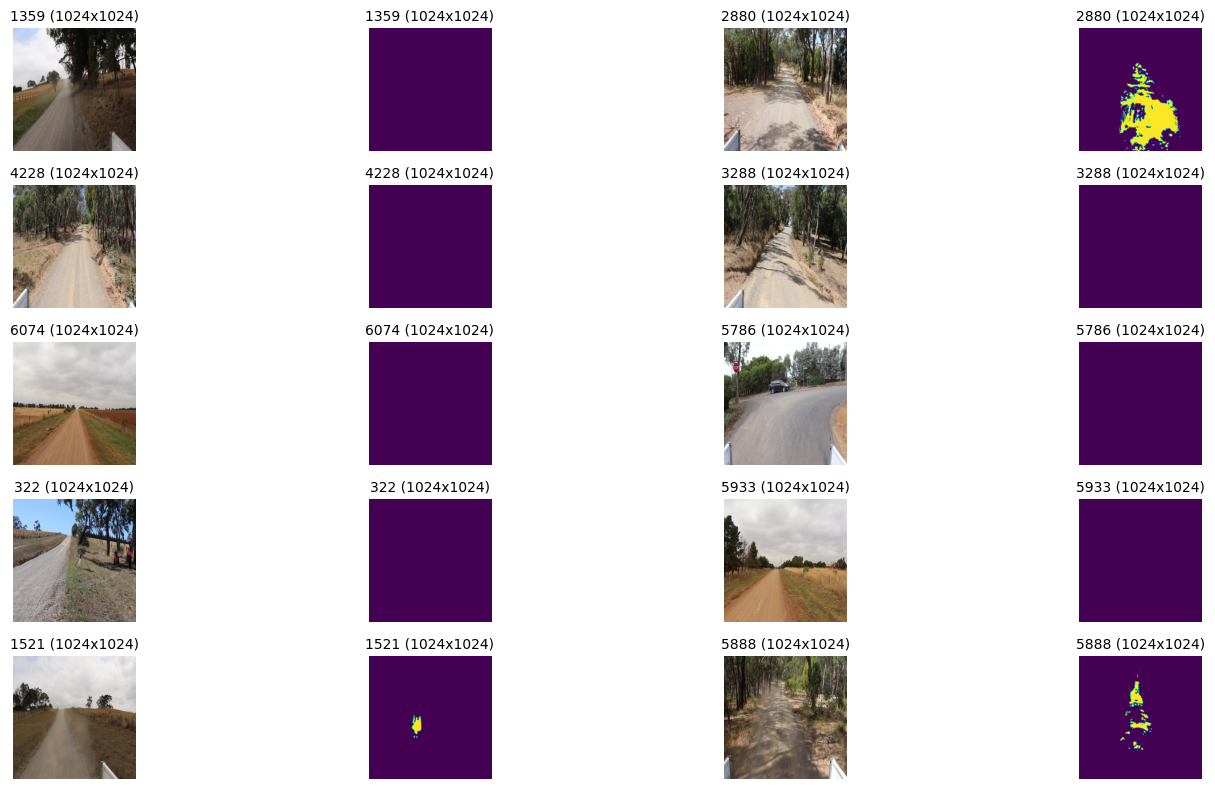

In [9]:
def visualize_images(img_folder: str, mask_folder: str, nb_samples: int = 10, seed: int = 42):
    """
    Visualize random pairs of images and their corresponding masks with common file name as title.

    Parameters:
    img_folder (str): Path to the folder containing images.
    mask_folder (str): Path to the folder containing masks.
    nb_samples (int): Number of random image-mask pairs to display.
    """
    random.seed(seed)
    selection = random.sample(os.listdir(img_folder), nb_samples)

    # Calculate the number of rows needed
    nb_rows = nb_samples // 2 + nb_samples % 2

    plt.figure(figsize=(16, 8))  # Adjusting the overall size of the plot

    # Show images and their corresponding masks
    for i, img_file in enumerate(selection):
        # Load image and mask
        image = Image.open(os.path.join(img_folder, img_file))
        mask = Image.open(os.path.join(mask_folder, img_file))

        resolution = f"{image.width}x{image.height}"
        
        # Set up subplot for image
        plt.subplot(nb_rows, 4, 2*i + 1)
        plt.imshow(image)
        plt.title(f"{os.path.splitext(img_file)[0]} ({resolution})", fontsize=10)  

        plt.axis('off')

        # Set up subplot for mask
        plt.subplot(nb_rows, 4, 2*i + 2)
        plt.imshow(mask)
        plt.title(f"{os.path.splitext(img_file)[0]} ({resolution})", fontsize=10) 
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
visualize_images(img_folder, mask_folder, seed=seed)

In [10]:
def get_all_dims(img_folder: str):
    img_dimensions = []

    for img_file in os.listdir(img_folder):
        with Image.open(os.path.join(img_folder, img_file)) as img:
            img_dimensions.append((img.width, img.height))

    unique_dimensions = set(img_dimensions)
    print(f"Number of unique dimensions in images: {len(unique_dimensions)}")

    return unique_dimensions

In [11]:
get_all_dims(img_folder)

Number of unique dimensions in images: 1


{(1024, 1024)}

In [12]:
def create_histograms_of_dims(img_folder: str, nb_bins:int = None, mult: bool = False):
    """
    Creates histograms of the dimensions of image files in the given folders.

    Parameters:
    img_folder (str): Path to the folder containing images.

    Returns: \nothing
    """
    img_dimensions = []

    if nb_bins is None: nb_bins = int(np.sqrt(len(os.listdir(img_folder))))
    print(f'bin size: {nb_bins}')

    # Collect dimensions of images
    if mult:
        for img_file in os.listdir(img_folder):
            with Image.open(os.path.join(img_folder, img_file)) as img:
                img_dimensions.append(img.width * img.height)
    else : 
        for img_file in os.listdir(img_folder):
            with Image.open(os.path.join(img_folder, img_file)) as img:
                img_dimensions.append((img.width, img.height))

    # Plot histogram for image dimensions
    plt.figure(figsize=(24, 6))
    plt.hist(img_dimensions, bins=nb_bins, label='Images')
    plt.xlabel('Dimensions (width x height in pixels)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Image Dimensions')
    plt.legend()
    plt.show()

bin size: 85


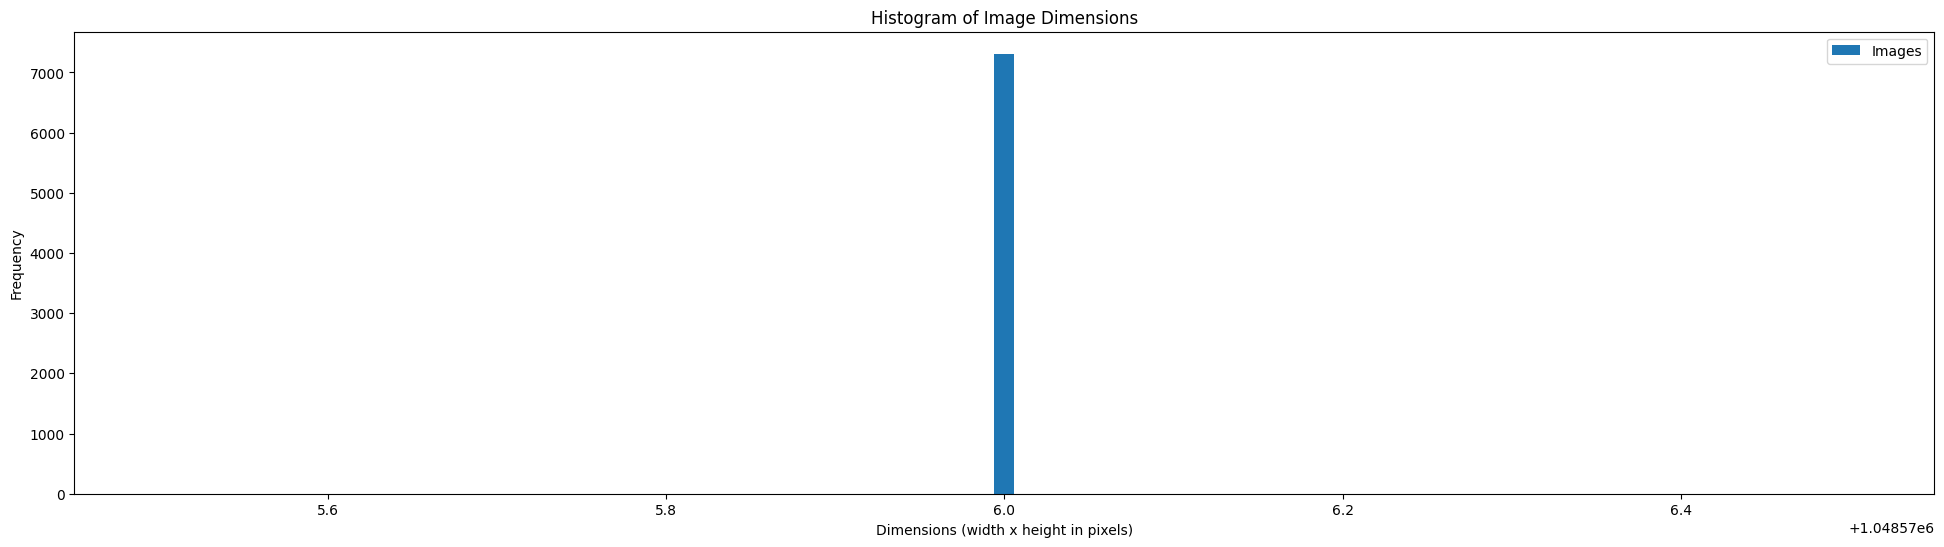

In [13]:
create_histograms_of_dims(img_folder, mult=True)

In [16]:
def create_folds_and_split_data(img_folder: str, mask_folder: str, output_dir: str, seed: int = 42, n_folds: int = 5):
    # 0. Set random seed
    np.random.seed(seed)
    
    # 1. Create folder structure
    img_output_dir = os.path.join(output_dir, 'imgs')
    mask_output_dir = os.path.join(output_dir, 'masks')

    for i in range(0, n_folds):
        os.makedirs(os.path.join(img_output_dir, f'fold_{i}'), exist_ok=True)
        os.makedirs(os.path.join(mask_output_dir, f'fold_{i}'), exist_ok=True)

    # 2. Shuffle and split images and masks
    img_files = sorted(os.listdir(img_folder))
    np.random.shuffle(img_files)

    fold_size = len(img_files) // n_folds
    print(f'Size of fold: {fold_size}')

    for i, img_file in enumerate(img_files):
        fold_num = (i // fold_size)
        if fold_num > n_folds - 1:  # Avoid additional fold with fewer images
            fold_num = n_folds - 1

        # 3. Copy files
        img_src = os.path.join(img_folder, img_file)
        img_dst = os.path.join(img_output_dir, f'fold_{fold_num}', img_file)
        shutil.copy(img_src, img_dst)

        # Copy corresponding mask
        mask_file = img_file
        mask_src = os.path.join(mask_folder, mask_file)
        if os.path.exists(mask_src):
            mask_dst = os.path.join(mask_output_dir, f'fold_{fold_num}', mask_file)
            shutil.copy(mask_src, mask_dst)

create_folds_and_split_data(img_folder, mask_folder, output_dir, seed)

Size of fold: 1462


In [17]:
def verify_image_mask_correspondence(output_dir, img_folder, mask_folder, n_folds=5):
    """
    Verify that every image in each fold has a corresponding mask and vice versa,
    and that the total count of images and masks matches the original dataset.

    Args:
    output_dir (str): The base directory where the 'imgs' and 'masks' subdirectories are located.
    img_folder (str): The directory containing the original images.
    mask_folder (str): The directory containing the original masks.
    n_folds (int): Number of folds to check for correspondence.

    Raises:
    Exception: If an image doesn't have a corresponding mask, a mask doesn't have a corresponding image,
               or the total count of images and masks doesn't match the original dataset.

    Returns:
    bool: True if all tests pass, False otherwise.
    """
    img_output_dir = os.path.join(output_dir, 'imgs')
    mask_output_dir = os.path.join(output_dir, 'masks')
    original_img_count = len(os.listdir(img_folder))
    original_mask_count = len(os.listdir(mask_folder))
    
    total_img_count = 0
    total_mask_count = 0

    for i in range(0, n_folds):
        img_fold_dir = os.path.join(img_output_dir, f'fold_{i}')
        mask_fold_dir = os.path.join(mask_output_dir, f'fold_{i}')

        img_files = set(os.listdir(img_fold_dir))
        mask_files = set(os.listdir(mask_fold_dir))
        total_img_count += len(img_files)
        total_mask_count += len(mask_files)

        # Test 1: Each image has a corresponding mask
        for img_file in img_files:
            if img_file not in mask_files:
                raise Exception(f"Image {img_file} in fold_{i} does not have a corresponding mask.")

        # Test 2: Each mask has a corresponding image
        for mask_file in mask_files:
            if mask_file not in img_files:
                raise Exception(f"Mask {mask_file} in fold_{i} does not have a corresponding image.")

    # Test 3: Total count of images and masks matches the original dataset
    if total_img_count != original_img_count or total_mask_count != original_mask_count:
        raise Exception("The total count of images or masks does not match the original dataset.")

    return True

try:
    tests_passed = verify_image_mask_correspondence(output_dir, img_folder, mask_folder, n_folds=nb_folds)
    if tests_passed:
        print("All tests passed successfully.")
except Exception as e:
    print(f"Error: {e}")

All tests passed successfully.


Inspecting fold #0


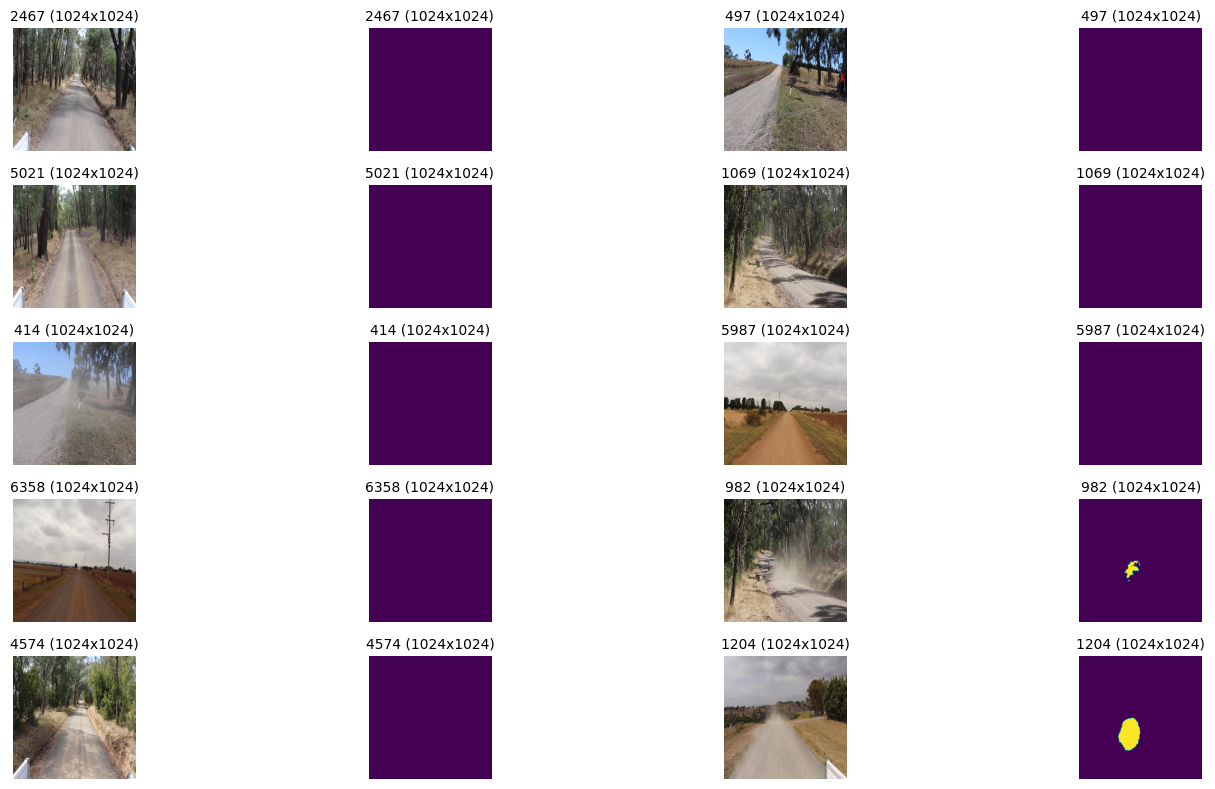

In [18]:
random.seed(seed)
rand_fold = random.randint(0, nb_folds - 1)
print(f'Inspecting fold #{rand_fold}')
visualize_images(os.path.join(output_dir, 'imgs', f'fold_{rand_fold}'), os.path.join(output_dir, 'masks', f'fold_{rand_fold}'), seed=seed)